<h1 style="color: rgb(0, 80, 120);font-size: 2rem;font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">TP3:  Image compression using K-means </h1>

In [49]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Find closest centroids function</h1>

In [50]:
def findClosestCentroids(X, centroids):
    m = X.shape[0]
    n = centroids.shape[0]
    idx = np.zeros((m), dtype = int)
    similarity = []
    for i in range(m):
        for j in range(n):
            dis = np.linalg.norm(X[i] - centroids[j])
            similarity.append(dis)
        idx[i] = np.argmin(similarity)
        similarity = []
    return idx

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Computing centroids function</h1>

In [51]:
def compute_centroids(X, idx, centroids):
    m = centroids.shape[0]
    n = X.shape[1]
    newCentroid = np.zeros((m, n))
    for i in range(m):
        newCentroid[i] = np.mean(X[idx == i], axis = 0)
    return newCentroid

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">K_means function</h1>

In [52]:
def k_means(X, centroids, iterations):
    for i in range(iterations):
        idx = findClosestCentroids(X, centroids)
        centroids = compute_centroids(X, idx, centroids)
    return idx, centroids

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Randomly reorder the indices of examples and taking the first K examples as centroids</h1>

In [53]:
def kMeans_init_centroids(X, K):
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Opening and identifying  the given image file</h1>

In [54]:
im = Image.open('img.jpg')

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Reading the image and printing the flatten shape</h1>

In [55]:
image = plt.imread('img.jpg')
print(image[:,:,0].flatten().shape)

(16384,)


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Image shape</h1>

In [56]:
print(image.shape)

(128, 128, 3)


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Reshaping image</h1>

In [57]:
image_reshaped = image.reshape(image.shape[0] * image.shape[1], 3)

In [58]:
image_reshaped.shape

(16384, 3)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Applying K_means to compress the image</h1>

In [59]:
iterations = 10
K = 16

centroids = kMeans_init_centroids(image_reshaped, K)
idx, centroids = k_means(image_reshaped, centroids, iterations)

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Centroids obtained</h1>

In [60]:
centroids = centroids.astype(int)
print(centroids)

[[ 19  20  17]
 [140 121 110]
 [179 157 131]
 [ 47  47  46]
 [249 231 184]
 [220 179 112]
 [248 244 217]
 [154 114  51]
 [ 77  80  92]
 [ 30  32  29]
 [112  88  65]
 [ 78  61  48]
 [202 191 190]
 [121 146 190]
 [200 146  73]
 [241 209 149]]


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Replacing every data point by the appropriate cluster</h1>

In [61]:
X_recovered = centroids[idx,:]
print(X_recovered)

[[220 179 112]
 [220 179 112]
 [220 179 112]
 ...
 [ 47  47  46]
 [ 78  61  48]
 [ 47  47  46]]


<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Reshaping the X_recovered to the original shape in order to retrieve the image</h1>

In [62]:
X_recovered = X_recovered.reshape(128,128,3) 

<h1 style="color: rgb(0, 90, 90);font-size: 1.3rem; font-family: 'Trebuchet MS', 'Lucida Sans Unicode', 'Lucida Grande', 'Lucida Sans', Arial, sans-serif;font-weight: bolder;">Presenting the compressed image as a final result</h1>

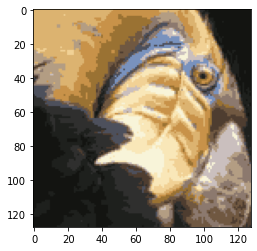

In [63]:
plt.imshow(X_recovered)